In [1]:
# Libraries

import os
import sys
import pandas as pd
import numpy as np
import pickle
import datetime as dt
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from langdetect import detect
import gensim
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline



In [2]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec
from gensim import models
from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument


In [3]:
%%time
sheet ="rpe_output_file_v2.0"
data= pd.DataFrame()
data = pd.read_csv("rpe_output_file_v2.0.csv", engine="c", thousands=".", decimal=',')

CPU times: user 152 ms, sys: 41 ms, total: 193 ms
Wall time: 193 ms


In [4]:
data.head()

,position_id,position_name,job_id,job_name,org_id,org_name,description_job_9100,description_job_9101,description_job_9105,description_job_9107,...,specify_part_of_financial_fig,if_no_specify_part_of_ff_of_super,crcy,management_view,employee_category,age,gender,country_code,company_name,division
0,1560836,Strategic Digital IT Solutions Head,73396634,Product Specialist,72086190,NaN,Execution<sep>-Leads change management efforts...,NaN,Education<sep>-University degree (Bachelor or ...,Drives user adoption of the product by creatin...,...,0,0.0,EUR,BAY-CH-PS-LAOP-PIL-ITPS,Managerial,51,Female,AR,"Bayer S.A., Argentina",CH
1,1560840,"""PM, SME, BI- Specialist & CSV Expert""",73396634,Product Specialist,72086190,NaN,Execution<sep>-Leads change management efforts...,NaN,Education<sep>-University degree (Bachelor or ...,Drives user adoption of the product by creatin...,...,35,0.0,EUR,BAY-CH-PS-LAOP-PIL-ITPS,Managerial,45,Male,AR,"Bayer S.A., Argentina",CH
2,1560841,CSV Expert,73396634,Product Specialist,72086190,NaN,Execution<sep>-Leads change management efforts...,NaN,Education<sep>-University degree (Bachelor or ...,Drives user adoption of the product by creatin...,...,0,0.0,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1825135,ITO Transformation,73396642,Performance & Service Manager,72051628,IT Spain,Governance<sep>-Drives service adoption and en...,NaN,Education<sep>- University degree in computer ...,The Performance & Service Manager is responsib...,...,0,0.0,EUR,BAY-FI-IT-DTPH-PP-CU,Managerial,51,Male,ES,Euroservices Bayer S.L.,EF
4,1825135,ITO Transformation,73396642,Performance & Service Manager,72083369,Customer,Governance<sep>-Drives service adoption and en...,NaN,Education<sep>- University degree in computer ...,The Performance & Service Manager is responsib...,...,0,0.0,EUR,BAY-FI-IT-DTPH-PP-CU,Managerial,51,Male,ES,Euroservices Bayer S.L.,EF


In [5]:
data.describe()

,position_id,job_id,org_id,description_job_9101,knowledge,Innovative thinking,Accountability,hay_value,hay_last_changed_on,hay_it,geo_scope,resource_reports,functional_reports,X3rd_party_reports,managed_positions,relevant_financial_magn__of_superior_pos,relevant_financial_magn__of_superior_pos_1,position_responsible_spec,if_no_specify_part_of_ff_of_super
count,4.801000e+03,4.801000e+03,4.801000e+03,0.0,3845.000000,3845.000000,3845.000000,3845.000000,3.845000e+03,3845.0,840.000000,3600.000000,3600.000000,3600.000000,3600.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,6.358061e+07,7.339663e+07,6.828788e+07,NaN,273.801560,117.375033,134.046554,525.754226,1.588998e+07,9504.0,3.146429,0.337500,0.005278,1.395833,0.416944,8.371745,2.574080,15.374139,0.043400
std,1.719427e+07,5.393797e+01,1.286025e+07,NaN,50.731818,27.581943,37.001261,110.828223,8.242541e+06,0.0,1.183412,1.898138,0.144261,10.377950,3.371800,12.064476,8.410553,10.553291,0.737918
min,1.560836e+06,7.339620e+07,1.680018e+06,NaN,0.000000,0.000000,0.000000,0.000000,1.022017e+06,9504.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.202290e+07,7.339663e+07,7.208233e+07,NaN,230.000000,100.000000,115.000000,432.000000,9.072020e+06,9504.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.252022e+07,7.339664e+07,7.208497e+07,NaN,264.000000,115.000000,115.000000,494.000000,1.607202e+07,9504.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,7.262640e+07,7.339664e+07,7.208958e+07,NaN,304.000000,132.000000,152.000000,588.000000,2.209202e+07,9504.0,4.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,20.000000,0.000000
max,7.268833e+07,7.339664e+07,7.210215e+07,NaN,460.000000,230.000000,304.000000,994.000000,3.110201e+07,9504.0,4.000000,48.000000,5.000000,510.000000,115.000000,50.000000,50.000000,50.000000,25.000000


In [6]:
data.shape

(4801, 57)

In [7]:
data.columns

Index(['position_id', 'position_name', 'job_id', 'job_name', 'org_id',
       'org_name', 'description_job_9100', 'description_job_9101',
       'description_job_9105', 'description_job_9107', 'description_9100',
       'description_9101', 'description_9102', 'description_9103',
       'description_9105', 'description_9106', 'description_9107',
       'description_9109', 'description_9111', 'knowledge',
       'Innovative thinking', 'Accountability', 'hay_value', 'vs_grade',
       'hay_last_changed_on', 'hay_it', 'geo_scope', 'description_9029',
       'individual_contributor', 'team_member', 'team_leader', 'supervisor',
       'manage_supervisors', 'manage_function_department', 'resource_reports',
       'functional_reports', 'X3rd_party_reports', 'managed_positions',
       'local_code', 'relevant_financial_magn__of_superior_pos',
       'relevant_financial_magn__of_superior_pos_1', 'amount', 'amount_1',
       'yes', 'no', 'position_responsible_spec', 'specify_amount',
       'spec

In [8]:
data.dtypes

position_id                                     int64
position_name                                  object
job_id                                          int64
job_name                                       object
org_id                                          int64
org_name                                       object
description_job_9100                           object
description_job_9101                          float64
description_job_9105                           object
description_job_9107                           object
description_9100                               object
description_9101                               object
description_9102                               object
description_9103                               object
description_9105                               object
description_9106                               object
description_9107                               object
description_9109                               object
description_9111            

In [9]:
New_df = data.filter(['job_name','description_9100','description_9105'], axis=1)
New_df.head()


,job_name,description_9100,description_9105
0,Product Specialist,• Manage and drive the IT site strategy and ro...,"Education:<sep>- IT, Computer Science or Busin..."
1,Product Specialist,NaN,NaN
2,Product Specialist,-Responsable de la gestión de proyectos y sopo...,Educación:<sep>Estudiante universitario en Sis...
3,Performance & Service Manager,• Plan and align the impact of diverse project...,Education:<sep>• University Degree or superior...
4,Performance & Service Manager,• Plan and align the impact of diverse project...,Education:<sep>• University Degree or superior...


In [10]:
#job_agg.to_csv("name.csv")

Class counts for Job_name : 
 Software Engineer                   1143
Product Specialist                   696
Product Manager                      661
Data Scientist                       524
Data Engineer                        467
IT Architect                         369
Product Designer                     307
Performance & Service Manager        246
Infrastructure Service Architect     198
Data Architect                       116
Security Engineer                     74
Name: job_name, dtype: int64


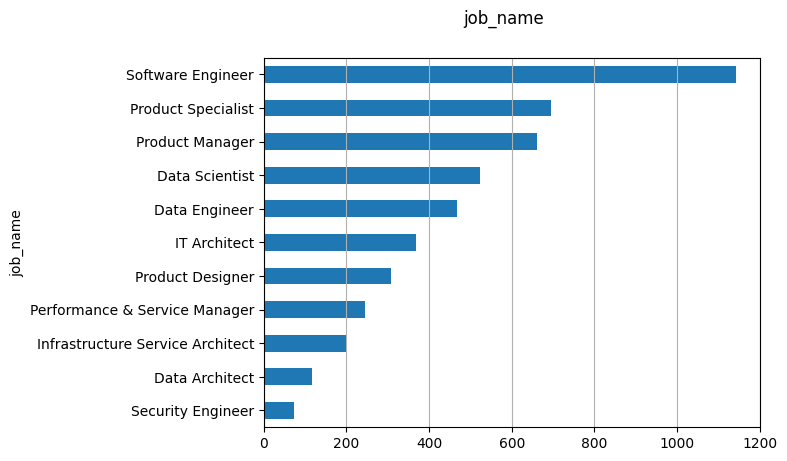

In [11]:
print('Class counts for Job_name : \n',New_df['job_name'].value_counts())

fig, ax = plt.subplots()
fig.suptitle('job_name', fontsize=12)
New_df['job_name'].reset_index().groupby('job_name').count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [12]:
# Focusing on job description !!!

# Steps to be taken :
#
#     1. Text pre-processing:
#         1.1 Aggregration of both the job_des
#         1.2 replacing the <sep> with space
#         1.3 remove punctuation
#         1.4 lowering the case
#         1.5 tokenization
#         1.6 remove stopwords from tokenized text
        
#     2. Feature extraction:
#         2.1 Word2vec embedding

In [13]:
New_df['Job_descriptions']= New_df['description_9100'] + "." + New_df['description_9105']
New_df.head()


,job_name,description_9100,description_9105,Job_descriptions
0,Product Specialist,• Manage and drive the IT site strategy and ro...,"Education:<sep>- IT, Computer Science or Busin...",• Manage and drive the IT site strategy and ro...
1,Product Specialist,NaN,NaN,NaN
2,Product Specialist,-Responsable de la gestión de proyectos y sopo...,Educación:<sep>Estudiante universitario en Sis...,-Responsable de la gestión de proyectos y sopo...
3,Performance & Service Manager,• Plan and align the impact of diverse project...,Education:<sep>• University Degree or superior...,• Plan and align the impact of diverse project...
4,Performance & Service Manager,• Plan and align the impact of diverse project...,Education:<sep>• University Degree or superior...,• Plan and align the impact of diverse project...


In [14]:
#New_df['description_9100'] = New_df['description_9100'].astype("string")
#New_df['description_9105'] = New_df['description_9105'].astype("string")
#New_df['Job_descriptions'] = New_df['Job_descriptions'].astype("string")

In [15]:
New_df.dtypes

job_name            object
description_9100    object
description_9105    object
Job_descriptions    object
dtype: object

In [16]:
df1 = New_df.dropna()
df1

,job_name,description_9100,description_9105,Job_descriptions
0,Product Specialist,• Manage and drive the IT site strategy and ro...,"Education:<sep>- IT, Computer Science or Busin...",• Manage and drive the IT site strategy and ro...
2,Product Specialist,-Responsable de la gestión de proyectos y sopo...,Educación:<sep>Estudiante universitario en Sis...,-Responsable de la gestión de proyectos y sopo...
3,Performance & Service Manager,• Plan and align the impact of diverse project...,Education:<sep>• University Degree or superior...,• Plan and align the impact of diverse project...
4,Performance & Service Manager,• Plan and align the impact of diverse project...,Education:<sep>• University Degree or superior...,• Plan and align the impact of diverse project...
6,Product Designer,• Coordinate project implementation with inter...,• Self-starter and capable to manage multiple ...,• Coordinate project implementation with inter...
...,...,...,...,...
4790,Product Specialist,– Understands and contributes to the business ...,– Bachelor’s and/or Master’s degree in Compute...,– Understands and contributes to the business ...
4791,Product Specialist,– Understands and contributes to the business ...,– Bachelor’s and/or Master’s degree in Compute...,– Understands and contributes to the business ...
4792,Product Designer,"- Full responsibility to develop, deploy and m...","- university degree in IT, MBA with focus in T...","- Full responsibility to develop, deploy and m..."
4797,Product Manager,– Understands and contributes to the business ...,– Bachelor’s and/or Master’s degree in Compute...,– Understands and contributes to the business ...


In [17]:
#df1[df1.Job_descriptions.isnull()]

In [18]:
df_filter = df1.filter(['job_name','Job_descriptions'], axis=1)
df_filter

,job_name,Job_descriptions
0,Product Specialist,• Manage and drive the IT site strategy and ro...
2,Product Specialist,-Responsable de la gestión de proyectos y sopo...
3,Performance & Service Manager,• Plan and align the impact of diverse project...
4,Performance & Service Manager,• Plan and align the impact of diverse project...
6,Product Designer,• Coordinate project implementation with inter...
...,...,...
4790,Product Specialist,– Understands and contributes to the business ...
4791,Product Specialist,– Understands and contributes to the business ...
4792,Product Designer,"- Full responsibility to develop, deploy and m..."
4797,Product Manager,– Understands and contributes to the business ...


In [19]:
# removing the rows which contain texts other than english.

def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_lat = df_filter[df_filter['Job_descriptions'].apply(detect_en)]
df_lat.head()

,job_name,Job_descriptions
0,Product Specialist,• Manage and drive the IT site strategy and ro...
3,Performance & Service Manager,• Plan and align the impact of diverse project...
4,Performance & Service Manager,• Plan and align the impact of diverse project...
6,Product Designer,• Coordinate project implementation with inter...
31,Product Specialist,"1- Responsible for Orchestration, control and ..."


In [20]:
#from easynmt import EasyNMT
#model = EasyNMT("opus-mt")

#df1["Job_descriptions"] = df1.apply(lambda row: model.translate(row["Job_descriptions"] , target_lang="en"), axis=1)
#df1.head()

In [21]:
df_lat.to_csv("translate.csv")

In [22]:
## job description aggregated
#job_agg = New_df.groupby(['job_name']).sum().reset_index()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#job_agg


In [23]:
df_lat['Job_descriptions'] = df_lat['Job_descriptions'].str.replace('<sep>-', ' ')
df_lat['Job_descriptions'] = df_lat['Job_descriptions'].str.replace('<sep>', ' ')
df_lat


/tmp/ipykernel_4933/1407597684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['Job_descriptions'] = df_lat['Job_descriptions'].str.replace('<sep>-', ' ')
/tmp/ipykernel_4933/1407597684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['Job_descriptions'] = df_lat['Job_descriptions'].str.replace('<sep>', ' ')


,job_name,Job_descriptions
0,Product Specialist,• Manage and drive the IT site strategy and ro...
3,Performance & Service Manager,• Plan and align the impact of diverse project...
4,Performance & Service Manager,• Plan and align the impact of diverse project...
6,Product Designer,• Coordinate project implementation with inter...
31,Product Specialist,"1- Responsible for Orchestration, control and ..."
...,...,...
4790,Product Specialist,– Understands and contributes to the business ...
4791,Product Specialist,– Understands and contributes to the business ...
4792,Product Designer,"- Full responsibility to develop, deploy and m..."
4797,Product Manager,– Understands and contributes to the business ...


In [24]:
#defining the function to remove punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df_lat['clean_msg']= df_lat['Job_descriptions'].apply(lambda x:remove_punctuation(x))
df_lat.head()

/tmp/ipykernel_4933/1274260744.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['clean_msg']= df_lat['Job_descriptions'].apply(lambda x:remove_punctuation(x))


,job_name,Job_descriptions,clean_msg
0,Product Specialist,• Manage and drive the IT site strategy and ro...,• Manage and drive the IT site strategy and ro...
3,Performance & Service Manager,• Plan and align the impact of diverse project...,• Plan and align the impact of diverse project...
4,Performance & Service Manager,• Plan and align the impact of diverse project...,• Plan and align the impact of diverse project...
6,Product Designer,• Coordinate project implementation with inter...,• Coordinate project implementation with inter...
31,Product Specialist,"1- Responsible for Orchestration, control and ...",1 Responsible for Orchestration control and Ma...


In [25]:
df_lat['clean_msg'] = df_lat['clean_msg'].replace(u'•', '', regex=True)
df_lat['clean_msg'] = df_lat['clean_msg'].replace(u'-', '', regex=True)
df_lat.head()

/tmp/ipykernel_4933/255673118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['clean_msg'] = df_lat['clean_msg'].replace(u'•', '', regex=True)
/tmp/ipykernel_4933/255673118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['clean_msg'] = df_lat['clean_msg'].replace(u'-', '', regex=True)


,job_name,Job_descriptions,clean_msg
0,Product Specialist,• Manage and drive the IT site strategy and ro...,Manage and drive the IT site strategy and roa...
3,Performance & Service Manager,• Plan and align the impact of diverse project...,Plan and align the impact of diverse projects...
4,Performance & Service Manager,• Plan and align the impact of diverse project...,Plan and align the impact of diverse projects...
6,Product Designer,• Coordinate project implementation with inter...,Coordinate project implementation with intern...
31,Product Specialist,"1- Responsible for Orchestration, control and ...",1 Responsible for Orchestration control and Ma...


In [26]:
df_lat['lower_case']= df_lat['clean_msg'].apply(lambda x: x.lower())
df_lat.head()

/tmp/ipykernel_4933/1702585281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['lower_case']= df_lat['clean_msg'].apply(lambda x: x.lower())


,job_name,Job_descriptions,clean_msg,lower_case
0,Product Specialist,• Manage and drive the IT site strategy and ro...,Manage and drive the IT site strategy and roa...,manage and drive the it site strategy and roa...
3,Performance & Service Manager,• Plan and align the impact of diverse project...,Plan and align the impact of diverse projects...,plan and align the impact of diverse projects...
4,Performance & Service Manager,• Plan and align the impact of diverse project...,Plan and align the impact of diverse projects...,plan and align the impact of diverse projects...
6,Product Designer,• Coordinate project implementation with inter...,Coordinate project implementation with intern...,coordinate project implementation with intern...
31,Product Specialist,"1- Responsible for Orchestration, control and ...",1 Responsible for Orchestration control and Ma...,1 responsible for orchestration control and ma...


In [27]:

df_lat['clean_msg'] = df_lat['clean_msg'].astype("string")
df_lat['lower_case'] = df_lat['lower_case'].astype("string")

/tmp/ipykernel_4933/733715318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['clean_msg'] = df_lat['clean_msg'].astype("string")
/tmp/ipykernel_4933/733715318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lat['lower_case'] = df_lat['lower_case'].astype("string")


In [28]:
filter_new =  df_lat.filter(['job_name','lower_case'], axis=1)
filter_new

,job_name,lower_case
0,Product Specialist,manage and drive the it site strategy and roa...
3,Performance & Service Manager,plan and align the impact of diverse projects...
4,Performance & Service Manager,plan and align the impact of diverse projects...
6,Product Designer,coordinate project implementation with intern...
31,Product Specialist,1 responsible for orchestration control and ma...
...,...,...
4790,Product Specialist,– understands and contributes to the business ...
4791,Product Specialist,– understands and contributes to the business ...
4792,Product Designer,full responsibility to develop deploy and mai...
4797,Product Manager,– understands and contributes to the business ...


In [29]:
filter_new['replace']= filter_new['lower_case'].apply(''.join).str.replace('[^A-Za-z\s]+', '')
filter_new.head()

/tmp/ipykernel_4933/712572988.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  filter_new['replace']= filter_new['lower_case'].apply(''.join).str.replace('[^A-Za-z\s]+', '')


,job_name,lower_case,replace
0,Product Specialist,manage and drive the it site strategy and roa...,manage and drive the it site strategy and roa...
3,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...
4,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...
6,Product Designer,coordinate project implementation with intern...,coordinate project implementation with intern...
31,Product Specialist,1 responsible for orchestration control and ma...,responsible for orchestration control and man...


In [30]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [31]:
filter_new['Text_parsed'] = filter_new['replace'].apply(process_text)

In [32]:
filter_new.head()

,job_name,lower_case,replace,Text_parsed
0,Product Specialist,manage and drive the it site strategy and roa...,manage and drive the it site strategy and roa...,manage drive site strategy roadmap alignment s...
3,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...
4,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...
6,Product Designer,coordinate project implementation with intern...,coordinate project implementation with intern...,coordinate project implementation internal ext...
31,Product Specialist,1 responsible for orchestration control and ma...,responsible for orchestration control and man...,responsible orchestration control management s...


In [33]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
filter_new['Category_job_name']= label_encoder.fit_transform(filter_new['job_name']) 

In [34]:
filter_new.head()

,job_name,lower_case,replace,Text_parsed,Category_job_name
0,Product Specialist,manage and drive the it site strategy and roa...,manage and drive the it site strategy and roa...,manage drive site strategy roadmap alignment s...,8
3,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...,5
4,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...,5
6,Product Designer,coordinate project implementation with intern...,coordinate project implementation with intern...,coordinate project implementation internal ext...,6
31,Product Specialist,1 responsible for orchestration control and ma...,responsible for orchestration control and man...,responsible orchestration control management s...,8


In [49]:
filter_new.to_csv("parsed.csv")

## Split the data in Training and testing

In [35]:
#Split the data in Training and testing
X_train, X_test, y_train, y_test = train_test_split(filter_new['Text_parsed'], 
                                                    filter_new['Category_job_name'], 
                                                    test_size=0.2, 
                                                    random_state=8)
ngram_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 300
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.06412703 0.         0.12002337 ... 0.         0.         0.        ]
 [0.         0.32051418 0.         ... 0.         0.         0.        ]
 [0.06047009 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.06163844 0.12986099 0.         ... 0.21166072 0.         0.        ]
 [0.08252366 0.         0.         ... 0.         0.         0.        ]
 [0.16178602 0.         0.08521946 ... 0.         0.         0.        ]]
(571, 300)


In [36]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)

In [37]:
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6847635726795096
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.74      0.63      0.68        49
           2       0.89      0.82      0.85        76
           3       0.53      0.65      0.58        43
           4       0.87      0.48      0.62        27
           5       0.66      0.68      0.67        34
           6       0.52      0.40      0.45        35
           7       0.72      0.80      0.76       103
           8       0.58      0.53      0.55        72
           9       0.82      0.82      0.82        11
          10       0.64      0.77      0.70       102

    accuracy                           0.68       571
   macro avg       0.70      0.66      0.67       571
weighted avg       0.69      0.68      0.68       571



In [38]:

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [39]:
#Hyper Paramater Tuning(Random Forest)

from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [40]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [48]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6830122591943958
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.76      0.63      0.69        49
           2       0.87      0.79      0.83        76
           3       0.52      0.60      0.56        43
           4       0.88      0.52      0.65        27
           5       0.69      0.71      0.70        34
           6       0.56      0.40      0.47        35
           7       0.72      0.80      0.76       103
           8       0.56      0.54      0.55        72
           9       0.75      0.82      0.78        11
          10       0.64      0.77      0.70       102

    accuracy                           0.68       571
   macro avg       0.70      0.66      0.67       571
weighted avg       0.69      0.68      0.68       571



## Tokenization

In [42]:

# applying function to the column
filter_new['Tokenized'] = filter_new.apply(lambda row: nltk.word_tokenize(row['replace']), axis=1)
filter_new

,job_name,lower_case,replace,Text_parsed,Category_job_name,Tokenized
0,Product Specialist,manage and drive the it site strategy and roa...,manage and drive the it site strategy and roa...,manage drive site strategy roadmap alignment s...,8,"[manage, and, drive, the, it, site, strategy, ..."
3,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...,5,"[plan, and, align, the, impact, of, diverse, p..."
4,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...,5,"[plan, and, align, the, impact, of, diverse, p..."
6,Product Designer,coordinate project implementation with intern...,coordinate project implementation with intern...,coordinate project implementation internal ext...,6,"[coordinate, project, implementation, with, in..."
31,Product Specialist,1 responsible for orchestration control and ma...,responsible for orchestration control and man...,responsible orchestration control management s...,8,"[responsible, for, orchestration, control, and..."
...,...,...,...,...,...,...
4790,Product Specialist,– understands and contributes to the business ...,understands and contributes to the business s...,understands contributes business strategy need...,8,"[understands, and, contributes, to, the, busin..."
4791,Product Specialist,– understands and contributes to the business ...,understands and contributes to the business s...,understands contributes business strategy need...,8,"[understands, and, contributes, to, the, busin..."
4792,Product Designer,full responsibility to develop deploy and mai...,full responsibility to develop deploy and mai...,full responsibility develop deploy maintain on...,6,"[full, responsibility, to, develop, deploy, an..."
4797,Product Manager,– understands and contributes to the business ...,understands and contributes to the business s...,understands contributes business strategy need...,7,"[understands, and, contributes, to, the, busin..."


In [43]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
#defining the function to remove stopwords from tokenized text

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
filter_new['no_stopwords']= filter_new['Tokenized'].apply(lambda x:remove_stopwords(x))
filter_new.head()

,job_name,lower_case,replace,Text_parsed,Category_job_name,Tokenized,no_stopwords
0,Product Specialist,manage and drive the it site strategy and roa...,manage and drive the it site strategy and roa...,manage drive site strategy roadmap alignment s...,8,"[manage, and, drive, the, it, site, strategy, ...","[manage, drive, site, strategy, roadmap, align..."
3,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...,5,"[plan, and, align, the, impact, of, diverse, p...","[plan, align, impact, diverse, projects, diffe..."
4,Performance & Service Manager,plan and align the impact of diverse projects...,plan and align the impact of diverse projects...,plan align impact diverse projects different p...,5,"[plan, and, align, the, impact, of, diverse, p...","[plan, align, impact, diverse, projects, diffe..."
6,Product Designer,coordinate project implementation with intern...,coordinate project implementation with intern...,coordinate project implementation internal ext...,6,"[coordinate, project, implementation, with, in...","[coordinate, project, implementation, internal..."
31,Product Specialist,1 responsible for orchestration control and ma...,responsible for orchestration control and man...,responsible orchestration control management s...,8,"[responsible, for, orchestration, control, and...","[responsible, orchestration, control, manageme..."


In [45]:
filter_new.to_csv("shailll.csv")

In [46]:
#job description aggregated
job_aggg = filter_new.groupby(['job_name']).sum().reset_index()
pd.set_option("display.max_rows", None, "display.max_columns", None)
job_aggg

/tmp/ipykernel_4933/1456040592.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_aggg = filter_new.groupby(['job_name']).sum().reset_index()


,job_name,Category_job_name
0,Data Architect,0
1,Data Engineer,234
2,Data Scientist,644
3,IT Architect,828
4,Infrastructure Service Architect,504
5,Performance & Service Manager,1020
6,Product Designer,1158
7,Product Manager,3402
8,Product Specialist,2744
9,Security Engineer,423


In [47]:
job_aggg['no_stopwords'] = job_aggg['no_stopwords'].astype("string")
job_aggg['job_name'] = job_aggg['job_name'].astype("string")

KeyError: 'no_stopwords'

In [ ]:
pd.unique(job_aggg['job_name'])

In [ ]:
len(job_aggg.job_name.value_counts())